A1. Write a function to calculate the entropy associated with your dataset. (If your dataset contains
only continuous numeric data for outcome (a regression problem), employ equal width binning and
divide your data into 4 bins. Each bin may be considered as a categorical data value. Write a function
for equal width binning).

H =-EPi(log2 Pi)

In [69]:
import pandas as pd
from collections import Counter
import math

def load_dataset(file_path):
    return pd.read_csv(file_path)

def calculate_entropy(data, target_column):
    target_values = data[target_column]
    total_count = len(target_values)

    # Count occurrences of each unique value
    value_counts = Counter(target_values)

    # Compute entropy
    entropy_value = 0
    for count in value_counts.values():
        probability = count / total_count
        entropy_value -= probability * math.log2(probability)

    return entropy_value

if __name__ == "__main__":
    dataset_path = "/content/dataset.csv"
    dataset = load_dataset(dataset_path)
    entropy_result = calculate_entropy(dataset, "label")
    print("Entropy of the dataset:", entropy_result)

Entropy of the dataset: 1.0


A2. Calculate the Gini index value for your dataset.

In [70]:
import pandas as pd
from collections import Counter

def load_dataset(file_path):
    return pd.read_csv(file_path)

def calculate_gini(data, target_column):
    target_values = data[target_column]
    total_count = len(target_values)

    # Count occurrences of each unique value
    value_counts = Counter(target_values)

    # Compute Gini Index
    gini_index = 1 - sum((count / total_count) ** 2 for count in value_counts.values())

    return gini_index

if __name__ == "__main__":
    dataset_path = "/content/dataset.csv"
    dataset = load_dataset(dataset_path)
    gini_result = calculate_gini(dataset, "label")
    print("Gini Index of the dataset:", gini_result)


Gini Index of the dataset: 0.5


A3. Write your own module for detecting the feature / attribute for the root note of a Decision Tree.
Use Information gain as the impurity measure for identifying the root node. Assume that the
features are categorical or could be converted to categorical by binning.

In [71]:
import pandas as pd
from collections import Counter
import math

def load_dataset(file_path):
    return pd.read_csv(file_path)

def calculate_entropy(target_values):
    # Calculate entropy of a given column (target variable)
    total_count = len(target_values)
    value_counts = Counter(target_values)

    entropy_value = 0
    for count in value_counts.values():
        prob = count / total_count
        entropy_value -= prob * math.log2(prob)

    return entropy_value

def information_gain(data, target_column, feature_column):
    # Calculate Information Gain for a feature with respect to the target variable
    total_entropy = calculate_entropy(data[target_column])

    # Compute weighted entropy for feature splits
    unique_values = data[feature_column].unique()
    weighted_entropy = 0

    for value in unique_values:
        subset = data[data[feature_column] == value]
        prob = len(subset) / len(data)
        weighted_entropy += prob * calculate_entropy(subset[target_column])

    return total_entropy - weighted_entropy

def find_best_root_node(data, target_column):
    # Identify the best feature for the root node based on Information Gain
    feature_columns = [col for col in data.columns if col != target_column]

    ig_values = {}
    for feature in feature_columns:
        ig_values[feature] = information_gain(data, target_column, feature)

    # Select feature with the highest Information Gain
    best_feature = max(ig_values, key=ig_values.get)
    return best_feature, ig_values

if __name__ == "__main__":
    dataset_path = "/content/dataset.csv"
    dataset = load_dataset(dataset_path)

    best_root_feature, ig_scores = find_best_root_node(dataset, "label")

    print("Best Root Node Feature:", best_root_feature)
    print("Information Gain of Each Feature:", ig_scores)

Best Root Node Feature: tfidf_409
Information Gain of Each Feature: {'tfidf_0': 0.04889337399749638, 'tfidf_1': 0.03820966279771232, 'tfidf_2': 0.03819091364599159, 'tfidf_3': 0.03939875954906469, 'tfidf_4': 0.06879357179777057, 'tfidf_5': 0.23464331884070866, 'tfidf_6': 0.047529583033828815, 'tfidf_7': 0.04437529486084535, 'tfidf_8': 0.051889562522221655, 'tfidf_9': 0.026940151614809782, 'tfidf_10': 0.2196785967696515, 'tfidf_11': 0.28192247845045193, 'tfidf_12': 0.04564891514712155, 'tfidf_13': 0.3833666586763447, 'tfidf_14': 0.03126861550253246, 'tfidf_15': 0.05000118642718521, 'tfidf_16': 0.033779162053307, 'tfidf_17': 0.20947800183240017, 'tfidf_18': 0.05626074858405283, 'tfidf_19': 0.06380898955784864, 'tfidf_20': 0.09453960009653928, 'tfidf_21': 0.03379199348561002, 'tfidf_22': 0.06993492151339276, 'tfidf_23': 0.03751873638350278, 'tfidf_24': 0.06777197407913427, 'tfidf_25': 0.3118852371423696, 'tfidf_26': 0.9848424307492321, 'tfidf_27': 0.10375503032396016, 'tfidf_28': 0.131948

A4. If the feature is continuous valued for A3, use equal width or frequency binning for converting
the attribute to categorical valued. The binning type should be a parameter to the function built for
binning. Write your own function for the binning task. The number of bins to be created should also
be passed as a parameter to the function. Use function overloading to allow for usage of default
parameters if no parameters are passed.

In [72]:
import pandas as pd

def load_dataset(file_path):
    """Load dataset from CSV file."""
    return pd.read_csv(file_path)

def apply_binning(df, column_name):
    """Apply equal-width and equal-frequency binning."""
    df = df.dropna(subset=[column_name])  # Remove missing values
    df["binned_eq_width"], bins_eq_width = pd.cut(df[column_name], bins=4, labels=False, retbins=True)
    df["binned_eq_freq"], bins_eq_freq = pd.qcut(df[column_name], q=4, labels=False, retbins=True)
    return df, bins_eq_width, bins_eq_freq

# Main program
file_path = "/content/dataset.csv"
column_name = "tfidf_409"

df = load_dataset(file_path)
df, bins_eq_width, bins_eq_freq = apply_binning(df, column_name)

print("First 5 rows with Equal-Width Binning:\n", df[["binned_eq_width"]].head())
print("\nBin Edges (Equal Width):", bins_eq_width)
print("\nFirst 5 rows with Equal-Frequency Binning:\n", df[["binned_eq_freq"]].head())
print("\nBin Edges (Equal Frequency):", bins_eq_freq)

First 5 rows with Equal-Width Binning:
    binned_eq_width
0                0
1                0
2                1
3                2
4                1

Bin Edges (Equal Width): [-2.86481658 -1.42076619  0.01753102  1.45582822  2.89412542]

First 5 rows with Equal-Frequency Binning:
    binned_eq_freq
0               0
1               0
2               0
3               3
4               0

Bin Edges (Equal Frequency): [-2.85906339 -0.64907468  0.04676139  0.67618522  2.89412542]


A5. Expand the above functions to built your own Decision Tree module.

In [73]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

def load_dataset(file_path):
    """Load dataset from CSV file."""
    return pd.read_csv(file_path)

def apply_binning(df, column_name):
    """Apply equal-width binning."""
    df = df.dropna(subset=[column_name])  # Remove missing values
    df["binned_feature"] = pd.cut(df[column_name], bins=4, labels=False)
    return df

def train_decision_tree(X, y, max_depth=3):
    """Train a Decision Tree classifier."""
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(X, y)
    return tree

# Main program
file_path = "/content/dataset.csv"
column_name = "tfidf_409"

df = load_dataset(file_path)
df = apply_binning(df, column_name)

X = df["binned_feature"].values.reshape(-1, 1)  # Convert to 2D
y = df["label"].values  # Target labels

tree = train_decision_tree(X, y)
predictions = tree.predict(X)

print("\nPredictions:", predictions[:10])  # First 10 predictions


Predictions: [1 1 0 1 0 1 1 0 1 1]


A6. Draw and visualize the decision tree constructed based on your data. (Refer above provided web
sources [1] & [2] for understanding and learning on how to visualize a DT).

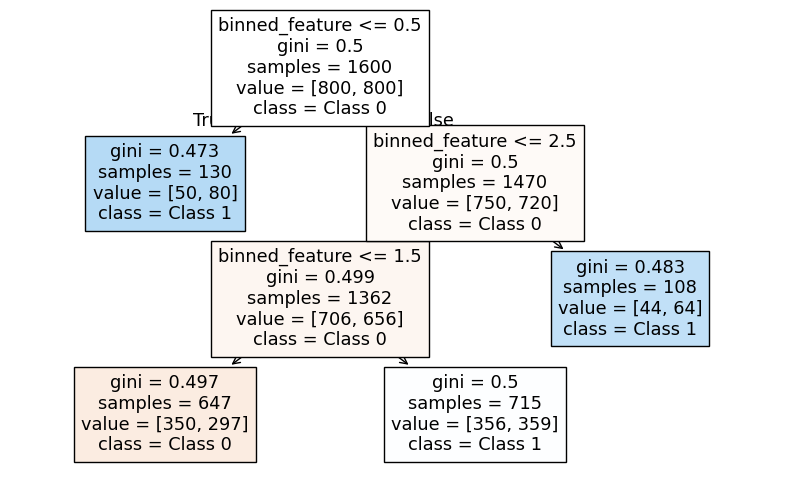

In [74]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

def visualize_decision_tree(tree, feature_names, class_names):
    """Plot the decision tree."""
    plt.figure(figsize=(10, 6))
    plot_tree(tree, feature_names=feature_names, class_names=class_names, filled=True)
    plt.show()

# Main program
feature_names = ["binned_feature"]
class_names = ["Class 0", "Class 1"]

visualize_decision_tree(tree, feature_names, class_names)

A7. Use 2 features from your dataset for a classification problem. Visualize the decision boundary
created by your DT in the vector space. (Refer above provided web source [3] & [2] for
understanding and learning on how to draw decision boundary for a DT).

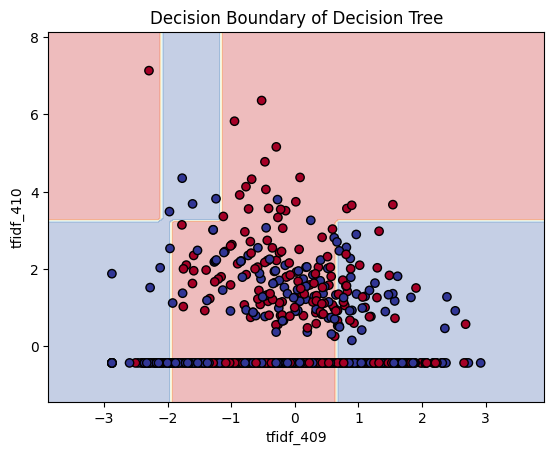

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def prepare_data(df, feature_columns, target_column, test_size=0.2, random_state=42):
    # prepare dataset by selecting features, splitting into train-test sets, and standardizing
    X = df[feature_columns].values
    y = df[target_column].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test

def train_decision_tree(X_train, y_train, max_depth=3, random_state=42):
    # Train a Decision Tree classifier
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)
    dt.fit(X_train, y_train)
    return dt

def plot_decision_boundary(model, X, y):
    # Plot decision boundary for a classifier
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu)
    plt.xlabel('tfidf_409')
    plt.ylabel('tfidf_410')
    plt.title('Decision Boundary of Decision Tree')
    plt.show()

# Main program
feature_columns = ['tfidf_409', 'tfidf_410']
target_column = 'label'

X_train, X_test, y_train, y_test = prepare_data(df, feature_columns, target_column)
dt = train_decision_tree(X_train, y_train)

# Visualizing the decision boundary
plot_decision_boundary(dt, X_train, y_train)